<a href="https://colab.research.google.com/github/masa512/ece558/blob/main/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 5.1

In [1]:
from skimage.data import shepp_logan_phantom 
from skimage.transform import resize,radon
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate Image
N = 32 # pick whatever size
X = resize(shepp_logan_phantom(), (N,N))

In [7]:
def projmtx(N,thetas):
  #Initialize bj's as columns
  B = np.diag(np.ones(N*N))
  M = thetas.shape[0]
  # Radon returns t by ang
  sinos = np.array([radon(B[:,j].reshape(N,N),theta=thetas,circle=False).reshape((-1)) for j in range(N*N)]).T
  return sinos

In [28]:
def art(y,x_0,T):
  x = x_0
  for t in range(2):
    # Lets do the forloop over j and l
    dx = np.linalg.inv(T.T@T)@(T.T @ (y-T@x))
    x = x + dx
  return x

## PART a

/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R = np.array([[cos_a, sin_a, -center * (cos_a + sin_a - 1)],


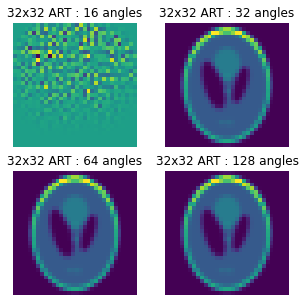

In [33]:
# 
f,axes = plt.subplots(2,2,figsize=(5,5))
axes = np.ravel(axes)

N_thetas = [16,32,64,128]
for i,Nt in enumerate(N_thetas):

  thetas = np.linspace(0., 180., Nt, endpoint=False).reshape((-1,1))
  x = X.reshape((-1,1))
  T = projmtx(N,thetas)
  y = T @ x

  # ART reconstruction
  x_0 = np.ones_like(x)
  xr = art(y,x_0,T)

  # Plot
  axes[i].imshow(xr.reshape(N,N))
  axes[i].set_title(f'{N}x{N} ART : {Nt} angles')
  axes[i].axis('off')


The reconstruction is fine as long as $N_{\theta} <= N$ where $N$ is one dimension of square image

## ART with positivity constraint

In [36]:
def art_plus(y,x_0,T):
  x = x_0
  for t in range(2):
    # Lets do the forloop over j and l
    dx = np.linalg.inv(T.T@T)@(T.T @ (y-T@x))
    x = x + dx
    x[x<0] = 0 # The positivity constraint!!
  return x


/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R = np.array([[cos_a, sin_a, -center * (cos_a + sin_a - 1)],


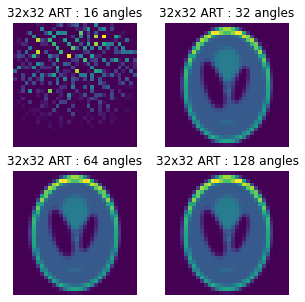

In [37]:
# 
f,axes = plt.subplots(2,2,figsize=(5,5))
axes = np.ravel(axes)

N_thetas = [16,32,64,128]
for i,Nt in enumerate(N_thetas):

  thetas = np.linspace(0., 180., Nt, endpoint=False).reshape((-1,1))
  x = X.reshape((-1,1))
  T = projmtx(N,thetas)
  y = T @ x

  # ART reconstruction
  x_0 = np.ones_like(x)
  xr = art_plus(y,x_0,T)

  # Plot
  axes[i].imshow(xr.reshape(N,N))
  axes[i].set_title(f'{N}x{N} ART : {Nt} angles')
  axes[i].axis('off')
